In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

Total slices: 110753, Positive: 56884, Negative: 53869
Slice idx=7414
  Image shape: (6, 128, 128), per-channel means: [-0.019969020038843155, 0.05419168993830681, 0.07952353358268738, 0.08290029317140579, 0.0, 0.0]
  per-channel stds: [0.7465298771858215, 0.9915505647659302, 1.060912013053894, 1.0655938386917114, 0.0, 0.0]
  Mask shape: (128, 128), unique values: [0 1]


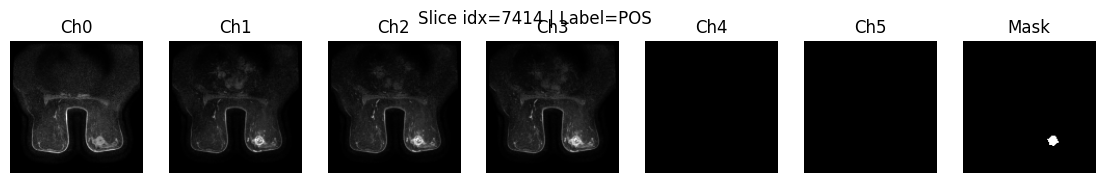

Slice idx=17006
  Image shape: (6, 128, 128), per-channel means: [-0.022892765700817108, 0.09532371163368225, 0.10601961612701416, 0.10401203483343124, 0.0, 0.0]
  per-channel stds: [0.6398641467094421, 1.0284570455551147, 1.0563465356826782, 1.0513403415679932, 0.0, 0.0]
  Mask shape: (128, 128), unique values: [0 1]


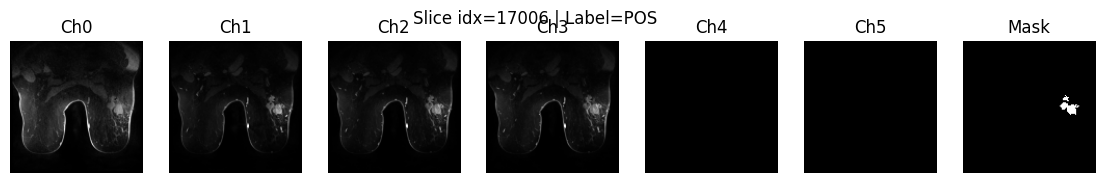

Slice idx=17229
  Image shape: (6, 128, 128), per-channel means: [0.20574188232421875, 0.26304876804351807, 0.27795320749282837, 0.27839195728302, 0.2743488848209381, 0.0]
  per-channel stds: [1.1466257572174072, 1.2431734800338745, 1.2199760675430298, 1.2080682516098022, 1.2069168090820312, 0.0]
  Mask shape: (128, 128), unique values: [0]


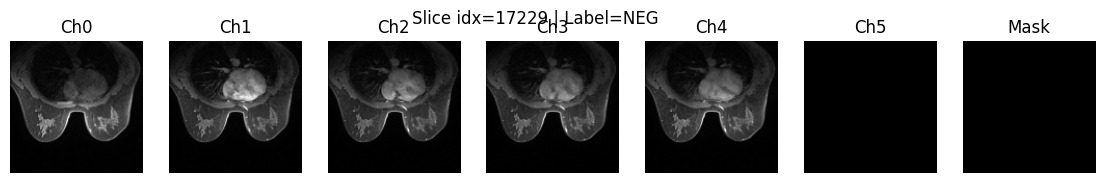

Slice idx=18689
  Image shape: (6, 128, 128), per-channel means: [-0.11937401443719864, -0.18252228200435638, -0.19085928797721863, -0.18368706107139587, 0.0, 0.0]
  per-channel stds: [0.9532849788665771, 0.7106341123580933, 0.6741004586219788, 0.6798430681228638, 0.0, 0.0]
  Mask shape: (128, 128), unique values: [0]


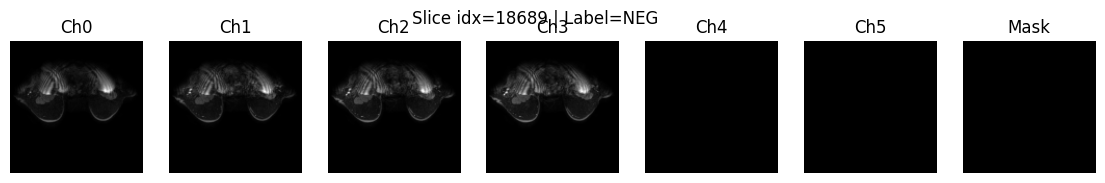

Slice idx=18690
  Image shape: (6, 128, 128), per-channel means: [-0.13404566049575806, -0.1942702829837799, -0.201598659157753, -0.19524438679218292, 0.0, 0.0]
  per-channel stds: [0.933260977268219, 0.6949776411056519, 0.6619569659233093, 0.6645994782447815, 0.0, 0.0]
  Mask shape: (128, 128), unique values: [0]


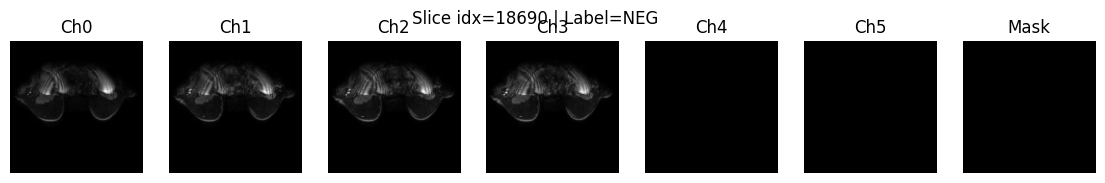

Slice idx=59541
  Image shape: (6, 128, 128), per-channel means: [0.32638871669769287, 0.3614077866077423, 0.3671003580093384, 0.4038920998573303, 0.40199533104896545, 0.43479692935943604]
  per-channel stds: [1.2329386472702026, 1.252974033355713, 1.2912812232971191, 1.3065935373306274, 1.3380318880081177, 1.3478754758834839]
  Mask shape: (128, 128), unique values: [0 1]


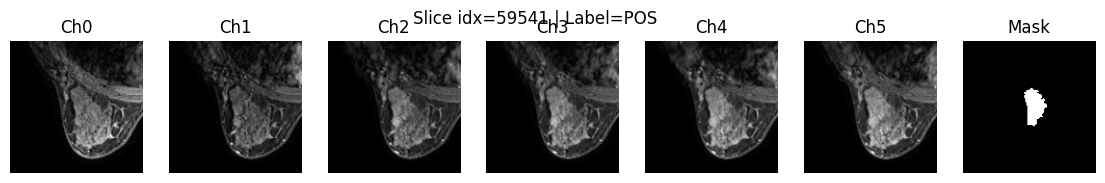

Slice idx=63664
  Image shape: (6, 128, 128), per-channel means: [0.11165033280849457, 0.07927079498767853, 0.06145263463258743, 0.05253253132104874, 0.04997865855693817, 0.04720439016819]
  per-channel stds: [1.1550590991973877, 1.0143526792526245, 0.9916586875915527, 0.9741737842559814, 0.9639614224433899, 0.9545029997825623]
  Mask shape: (128, 128), unique values: [0]


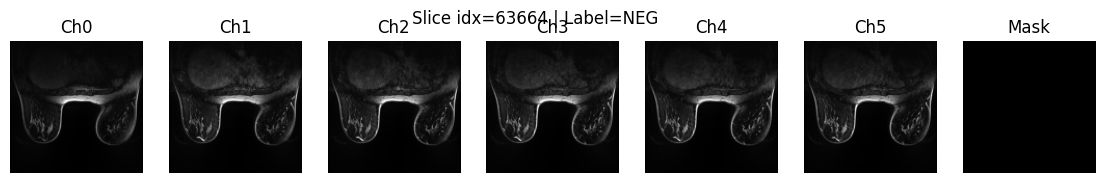

Slice idx=67170
  Image shape: (6, 128, 128), per-channel means: [0.5862880349159241, 0.6557431221008301, 0.6735106110572815, 0.6590498685836792, 0.6844183206558228, 0.6748993396759033]
  per-channel stds: [1.3814195394515991, 1.4815192222595215, 1.473960280418396, 1.45442533493042, 1.4647501707077026, 1.4486769437789917]
  Mask shape: (128, 128), unique values: [0 1]


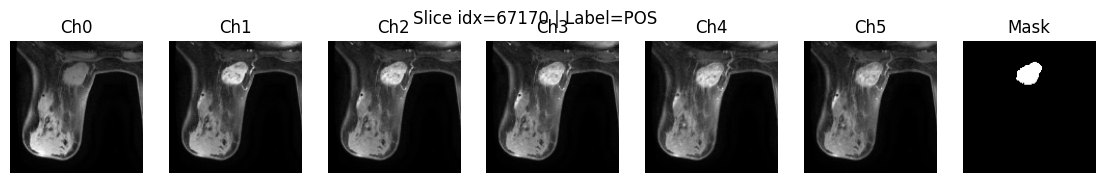

Slice idx=92788
  Image shape: (6, 128, 128), per-channel means: [0.14297816157341003, 0.16102305054664612, 0.15138031542301178, 0.15494218468666077, 0.15321855247020721, 0.15635819733142853]
  per-channel stds: [1.035452127456665, 1.1715185642242432, 1.1163973808288574, 1.1242525577545166, 1.0863860845565796, 1.0996105670928955]
  Mask shape: (128, 128), unique values: [0]


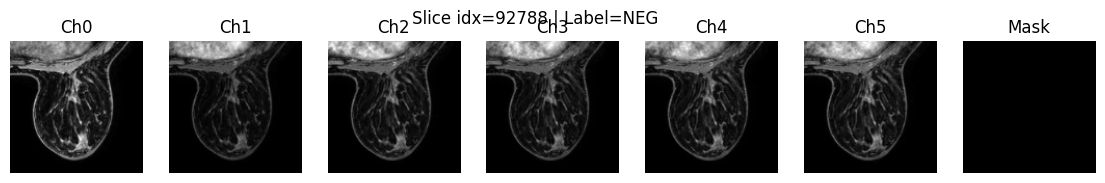

Slice idx=106975
  Image shape: (6, 128, 128), per-channel means: [0.09259240329265594, 0.06833970546722412, 0.06966546177864075, 0.0, 0.0, 0.0]
  per-channel stds: [1.1009407043457031, 1.009647250175476, 1.000870943069458, 0.0, 0.0, 0.0]
  Mask shape: (128, 128), unique values: [0 1]


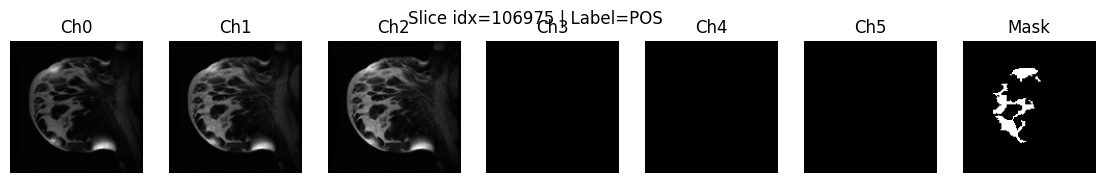

In [15]:
# Open HDF5 container
h5_path = "../data/processed/mama-mia_selected_slices.h5"
with h5py.File(h5_path, "r") as h5f:
    imgs = h5f["images"]   # (N, 6, H, W)
    msks = h5f["masks"]    # (N, 1, H, W)

    N = imgs.shape[0]

    # Identify positive vs negative slices by checking if mask has any 1s
    positive_idxs = []
    negative_idxs = []
    for i in range(N):
        if msks[i,0].sum() > 0:
            positive_idxs.append(i)
        else:
            negative_idxs.append(i)

    print(f"Total slices: {N}, Positive: {len(positive_idxs)}, Negative: {len(negative_idxs)}")

    # Randomly pick 5 of each
    n_pos = min(5, len(positive_idxs))
    n_neg = min(5, len(negative_idxs))
    pos_sample = np.random.choice(positive_idxs, n_pos, replace=False)
    neg_sample = np.random.choice(negative_idxs, n_neg, replace=False)
    sample_idxs = np.concatenate([pos_sample, neg_sample])
    sample_idxs.sort()

    # Plot and print stats for each sample
    for idx in sample_idxs:
        img   = imgs[idx]     # shape (6, H, W)
        mask  = msks[idx, 0]  # shape (H, W)

        # Compute per-channel mean and std
        means = [float(img[ch].mean()) for ch in range(img.shape[0])]
        stds  = [float(img[ch].std())  for ch in range(img.shape[0])]
        print(f"Slice idx={idx}")
        print(f"  Image shape: {img.shape}, per-channel means: {means}")
        print(f"  per-channel stds: {stds}")
        print(f"  Mask shape: {mask.shape}, unique values: {np.unique(mask)}")

        # Display channels and mask
        fig, axes = plt.subplots(1, img.shape[0]+1, figsize=(2*(img.shape[0]+1),2))
        for ch in range(img.shape[0]):
            axes[ch].imshow(img[ch], cmap="gray")
            axes[ch].axis("off")
            axes[ch].set_title(f"Ch{ch}")
        axes[-1].imshow(mask, cmap="gray")
        axes[-1].axis("off")
        axes[-1].set_title("Mask")
        plt.suptitle(f"Slice idx={idx} | Label={'POS' if idx in positive_idxs else 'NEG'}")
        plt.show()


Note on observed per‐slice statistics:

Performed z-score normalization across each entire volume (all slices),

i.e.:

    arr_img = (arr_img - arr_img.mean()) / (arr_img.std() + 1e-8)

This centers and scales the *whole* volume to mean≈0, std≈1.

Consequently, individual slices will generally have mean≠0 and std≠1,

but the aggregate over all voxels in the volume remains zero-mean/unit-std.


Padding channels (added to reach 6 phases) correctly show mean=0, std=0,

confirming zero-volume padding.